#Gradient Descent

In [1]:
import numpy as np
def gradient_descent(A, b, x0, alpha, num_iterations):
    i=0
    x=x0
    gradient = np.dot(A,x0)
    gradient = gradient - b
    #takes more i
    while (gradient != 0).any() and i < (num_iterations):
            x = x - alpha * gradient  
            gradient = np.dot(A,x)
            gradient = gradient - b
            i+=1
    return x

A = np.array([[4, -1], [-1, 2]])  
b = np.array([3, 1]) 
x0 = np.array([0, 0])
#example
alpha = 0.5
num_iterations = 1000

result = gradient_descent(A, b, x0, alpha, num_iterations)
print("Final parameter values:")
print(result)

Final parameter values:
[-2.78393876e+81  1.15314519e+81]


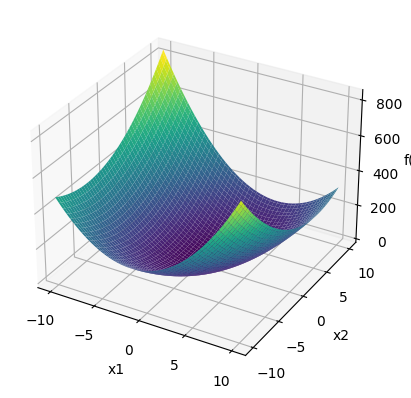

In [2]:
import matplotlib.pyplot as plt
def plot_function():
    A = np.array([[4, -1], [-1, 2]])
    b = np.array([3, 1])
    x0 = np.array([0, 0])

    #generate a range of values for x1 and x2
    x1_vals = np.linspace(-10, 10, 100)
    x2_vals = np.linspace(-10, 10, 100)
    X1, X2 = np.meshgrid(x1_vals, x2_vals)

    #calculate the corresponding Z values
    Z = np.zeros_like(X1)
    for i in range(len(x1_vals)):
        for j in range(len(x2_vals)):
            x0 = np.array([X1[i, j], X2[i, j]])
            result = result = gradient_descent(A, b, x0, alpha, num_iterations)
            Z[i, j] = np.dot(np.dot(x0, A), x0) - 2 * np.dot(b, x0)

    fig = plt.figure()
    ax = plt.axes(projection="3d")
    ax.plot_surface(X1, X2, Z, cmap='viridis')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('f(x)')
    plt.show()

# Call it
plot_function()


#Steepest Gradient descent

In [3]:
def is_positive_def(x):
    """check if a matrix is symmetric positive definite"""
    return np.all(np.linalg.eigvals(x) > 0)

In [4]:

def steepest_gradient_descent(A, b, x0, num_iterations):
    #print("Calculate the tracre of the matrix: ", A.diagonal().sum())
    i=0
    x=x0
    gradient = np.dot(A,x0)
    gradient = gradient - b
    while (gradient != 0).any() and i < (num_iterations): 
            Ax_minus_b = np.dot(A, x) - b
            step_size = (gradient.T@gradient) / np.dot(np.dot(A, Ax_minus_b), Ax_minus_b)
            x = x - step_size * gradient
            gradient = np.dot(A,x)
            gradient = gradient - b
            i+=1

    return x

A = np.array([[4, -1], [-1, 2]])  
b = np.array([3, 1]) 
x0 = np.array([0, 0])
#example
alpha = 0.5

num_iterations = 1000
result = steepest_gradient_descent(A, b, x0, num_iterations)
print("Final parameter values:")
print(result)


Final parameter values:
[1. 1.]


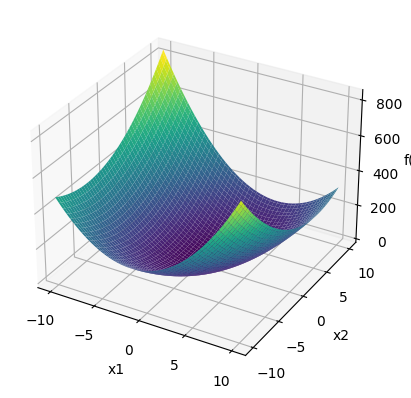

In [5]:
import matplotlib.pyplot as plt
def plot_function():
    A = np.array([[4, -1], [-1, 2]])
    b = np.array([3, 1])
    x0 = np.array([0, 0]) 
    x1_vals = np.linspace(-10, 10, 100)
    x2_vals = np.linspace(-10, 10, 100)
    X1, X2 = np.meshgrid(x1_vals, x2_vals)
    Z = np.zeros_like(X1)
    for i in range(len(x1_vals)):
        for j in range(len(x2_vals)):
            x0 = np.array([X1[i, j], X2[i, j]])
            result = steepest_gradient_descent(A, b, x0, num_iterations)
            Z[i, j] = np.dot(np.dot(x0, A), x0) - 2 * np.dot(b, x0)

    fig = plt.figure()
    ax = plt.axes(projection="3d")
    ax.plot_surface(X1, X2, Z, cmap='viridis')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('f(x)')
    plt.show()

# Call it
plot_function()